In [28]:
import json
import math
import random
from pathlib import Path
from pprint import pprint
from utils import load_dataset, create_dataset, write_test_data, gpt_prediction, eval_response, results_path
import matplotlib.pyplot as plt

output_dir = results_path / "sentence_faith"
if not output_dir.exists():
    output_dir.mkdir(parents=True)
dataset, tag_counts = load_dataset("sentences.json")
print(len(dataset))
pprint(tag_counts)

280
{'all_lower': 78,
 'all_upper': 59,
 'animate': 1,
 'city': 65,
 'even_words': 128,
 'fragment_subject': 20,
 'fragment_verb': 20,
 'gpt4': 280,
 'long': 65,
 'long_margin': 49,
 'margin': 50,
 'nature': 102,
 'odd_words': 152,
 'proper_noun': 32,
 'sentence': 240,
 'shared_sample': 42,
 'short': 215,
 'short_margin': 181,
 'start_cap': 201,
 'start_consonant': 226,
 'start_lower': 79,
 'start_the': 80,
 'start_vowel': 54}


In [29]:
tags_true = ["city", "long"]
tags_false = ["nature", "short"]
adversarial_true = ["city", "short"]
adversarial_false = ["nature", "long"]
tags_common = ["sentence", "start_cap"]
positives, negatives = create_dataset(dataset, tags_true, tags_false, tags_common, true_comb="AND", false_comb="AND")
adv_positives, adv_negatives = create_dataset(dataset, adversarial_true, adversarial_false, tags_common, true_comb="AND", false_comb="AND")
print(len(positives), len(negatives), len(adv_positives), len(adv_negatives))

37 42 26 23


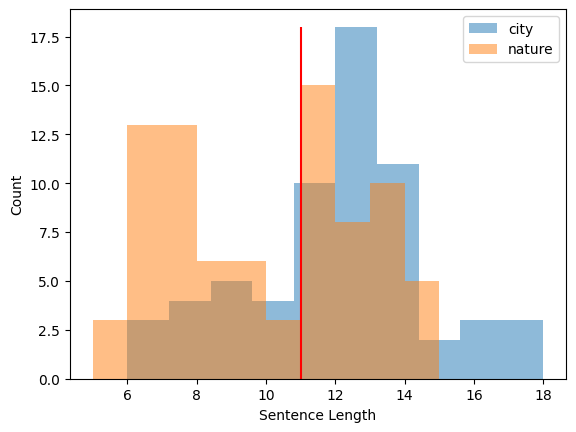

In [30]:
plt.hist([len(x["input"].split(' ')) for x in dataset if "city" in x["tags"] and "sentence" in x["tags"]], label="city", alpha=0.5)
plt.hist([len(x["input"].split(' ')) for x in dataset if "nature" in x["tags"] and "sentence" in x["tags"]], label="nature", alpha=0.5)
plt.vlines(x=11, ymin=0, ymax=18, colors="red")
plt.xlabel("Sentence Length")
plt.ylabel("Count")
plt.legend()

# Baseline

# Handholding Deception

# Free Deception